# 3. HÁZI FELADAT

# Tartsuk szem előtt!

Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat!
A kódrészletek legyenek letisztázottak, kommentek segítségével dokumentálandó minden megoldás.
Ezt a feladatsort pythonban kell megoldani jupyter notebookban.

In [1]:
from glob import glob
import cv2
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

# Főkomponens-analízis

A főkomponens-analízis, - más néven Karhunen-Loève-transzformáció - (angol nevén principal component analysis - PCA), egy lineáris eljárás, amely egy $D$ dimenziós vektorokból álló adathathalmazt egy ortogonális transzformáció - azaz $D$ dimenziós forgatás - segítségével olyan új bázisra visz át, ahol az adatvektorok közötti _kovariancia_ zérus. Az eredeti adatvektorok új bázis szerinti kifejtési együtthatóit főkomponenseknek nevezzük.

A főkomponens-analízis másképpen is megfogalmazható: Első lépésben keressük azt az irányvektort, melyre levetítve az adatvektorokat a projektált vektorok hosszának szórása maximálisnak adódik. Második lépésben levonjuk az adatvektorokból az így megtalált vektorra vett projekciót, majd az eljárást megismételjük oly módon, hogy megköveteljük, a következő irányvektor legyen merőleges az előzőleg megtaláltra. Az eljárást $D$-szer megismételve előáll a keresett bázis, amelyen az adatvektorokat kifejtve meghatározhatók a főkomponensek.

Jelöljük az adatvektorokat $\mathbf{x}_1, \mathbf{x}_2, ... \mathbf{x}_N$-nel, melyek mindegyike $D$ elemű. Legyen az $\mathbf{X}$ mátrix olyan, hogy sorvektoronként tartalmazza az $\mathbf{x}_i$ adatvektorokat, azaz $N$ sora és $D$ oszlopa van:

$$
X_{ij} =
\begin{bmatrix}
    x_{11}       & x_{12} & x_{13} & \dots & x_{1D} \\
    x_{21}       & x_{22} & x_{23} & \dots & x_{2D} \\
    ... \\
    x_{N1}       & x_{N2} & x_{N3} & \dots & x_{ND}
\end{bmatrix},
$$

ahol az első index adatvektorokat, a második pedig a vektorkomponenseket indexeli.

### A kovarianciamátrix módszere

Az $X$ mátrix segítségével a főkomponensek megtalálására több ekvivalens módszert is találhatunk. Elsőként tekintsük az adatvektorok kovarianciamátrixát, melyet az $\mathbf{X}$ mátrix segítségével a következő alakban írhatunk:

$$
\mathbf{C} = \frac{1}{N}(\mathbf{X} - \mathbf{\mu})^\mathrm{T}(\mathbf{X} - \mathbf{\mu}),
$$

ahol $\mathbf{X} - \mathbf{\mu}$ úgy értelmezendő, hogy a mátrix minden sorából levonjuk az oszloponként vett átlagot. Könnyű látni, hogy a kovarianciamátrix mindig $D \times D$ méretű, tehát ha a a dimenziószám nagy, és kevés adatvektor van, azaz $D \gg N$, akkor a kovarianciamátrix előállítása nem célszerű.

### A duális főkomponens-analízis

Ha fennáll, hogy $D \gg N$, akkor érdemesebb a

$$
\tilde{\mathbf{C}} = \frac{1}{N}(\mathbf{X} - \mathbf{\mu})(\mathbf{X} - \mathbf{\mu})^\mathrm{T}
$$

mátrixot tekinteni, melyről belátható, hogy sajátértékei megegyeznek $\mathbf{C}$ nem zérus sajátértékeivel, a sajátvektoraira pedig fennáll, hogy

$$
\mathbf{v_i} = \frac{1}{\sqrt{N\lambda_i}} (\mathbf{X} - \mathbf{\mu}) \tilde{\mathbf{v}}_i.
$$

Ez utóbbi kifejezés úgy ellenőrizhető, ha felírjuk a duális problémában szereplő $(\mathbf{X} - \mathbf{\mu})(\mathbf{X} - \mathbf{\mu})^\mathrm{T}$ mátrix sajátérték-egyenletét, majd balról megszorozzuk $(\mathbf{X} - \mathbf{\mu})$-vel.

### Főkomponens-analízis szingulárisérték-dekompozícióval

A szingulárisérték-dekompozíció (singular value decomposition - SVD) során egy tetszőleges $N \times M$ alakú mátrixot a következő módon faktorizálunk:

$$
\mathbf{X} = \mathbf{U} \mathbf{S} \mathbf{V}^\mathrm{T},
$$

ahol az $\mathbf{S}$ mátrix diagonális, és főátlójában az ún. szinguláris értékeket tartalmazza, $\mathbf{V}^\mathrm{T}$ oszlopaiban a jobboldali szinguláris vektorok, $\mathbf{U}$ soraiban pedig a baloldali szinguláris vektorok jelennek meg. A szinguláris értékek száma $K = \min(M, N)$, $\mathbf{U}$ és $\mathbf{V}^\mathrm{T}$ pedig általában $N \times N$ és $M \times M$ alakú mátrixok. Belátható, hogy

* az $\mathbf{U}$ baloldali szinguláris vektorok azonosak az $\mathbf{X}\mathbf{X}^\mathrm{T}$ mátrix ortonormált sajátvektoraival
* a $\mathbf{V}$ jobboldali szinguláris vektorok azonosak az $\mathbf{X}^\mathrm{T}\mathbf{X}$ mátrix ortonormált sajátvektoraival
* a nem zérus szinguláris értékek azonosak $\mathbf{X}\mathbf{X}^\mathrm{T}$ és $\mathbf{X}^\mathrm{T}\mathbf{X}$ nem zérus sajátértékeivel

Ezek figyelembe vételével a főkomponens-analízis közvetlenül SVD segítségével is elvégezhető, tekintve, hogy

$$
\mathbf{X}^\mathrm{T}\mathbf{X} = 
  (\mathbf{V} \mathbf{S}^\mathrm{T} \mathbf{U}^\mathrm{T})(\mathbf{U} \mathbf{S} \mathbf{V}^\mathrm{T}) = 
  \mathbf{V} \mathbf{S}^\mathrm{T} (\mathbf{U}^\mathrm{T} \mathbf{U}) \mathbf{S} \mathbf{V}^\mathrm{T} =
  \mathbf{V} \mathbf{S}^\mathrm{T} \mathbf{S} \mathbf{V}^\mathrm{T} =
  \mathbf{V} \mathbf{S}^2 \mathbf{V}^\mathrm{T}.
$$

A szingulárisérték-dekompozíció megvalósítására léteznek hatékony algoritmusok, így a kovarianciamátrix előállítása általában nem célszerű, de ha mégis szükséges, akkor többnyire a sajátérték-probléma megoldására is SVD-t használunk.

### A főkomponensek meghatározása

Fejtsük ki az eredeti adatvektorokat a kovarianciamátrix sajátvektorai által definiált bázison, azaz határozzuk meg az adatvektorok főkomponenseit! Ehhez elegendő belátni, hogy a főkomponensek előállnak a következő alakban:

$$
\mathbf{PC} = (\mathbf{X} - \mathbf{\mu}) \mathbf{V},
$$

ahol $\mathbf{V}$ a normált sajátvektorokból, mint oszlopvektorokból alkotott mátrix.

### Dimenzióredukció főkomponens-analízis segítségével

A kovarianciamátrix sajátértékei azt adják meg, hogy a nekik megfelelő sajátvektorokkal kijelölt irányokban mekkora az adatvektorok szórása. Belátható, hogy ha csak a néhány legnagyobb sajátértékhez tartozó sajátvektort, illetve főkomponenst tartjuk meg, akkor az adatvektoroknak egy olyan projekciójához jutunk, mely számot ad az adatokban rejlő variancia nagy részéről, viszont figyelmen kívül hagyja azokat az irányokat, amelyekben inkább csak _zaj_ látható. Emiatt a főkomponensanalízis hatékony lineáris adattömörítési, illetve zajszűrési eljárás is.

Ha a nagy dimenziószám nem indokolja, akkor a legnagyobb sajátértékek előállításához célszerű az SVD-n alapuló módszert alkalmazni, ugyanis az SVD-algoritmusok eleve nagyság szerint csökkenő sorrendben adják vissza a szinguláris értékeket. Ilyenkor a főkomponenseket nem az teljes sajátbázisra számítjuk ki, hanem csak az első $k$ legnagyobb szinguláris értékhez tartozó szinguláris vektort tartjuk meg a $\mathbf{V}$ mátrixból, és így végezzük el a korábbi kifejtést:

$$
\mathbf{PC}^{(k)} = (\mathbf{X} - \mathbf{\mu}) \mathbf{V}^{(k)},
$$

# Feladatok

## 1. feladat - Főkomponens-analízis két dimenzióban

Az alábbi függvény egy fent definiált alakú $\mathbf{X}$ mátrixot hoz létre. Ábrázoljuk a mátrixban tárolt adatvektorokat egy grafikonon pontok segítségével. Az ábrázoláskor állítsuk a grafikon vízszintes és függőleges méretét, valamint a tengelyek értéktartományát azonosra, hogy a különböző irányú szórások jól láthatók legyenek. Próbáljuk meg szemmel megállapítani, hogy mik lehetnek azok az irányok, melyekre levetítve az adatpontokat maximális lesz a projekciók hosszának szórása.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def gen_rand(N):
    mu = 6 * np.random.rand(2) - 3.0
    t = np.pi * np.random.rand()
    R = np.array([[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])
    sig = 2 * np.random.rand()
    C = np.diag([sig, sig + 3 * np.random.rand()])
    C = np.dot(R, np.dot(C, np.linalg.inv(R)))
    X = np.random.multivariate_normal(mu, C, N)
    return X

In [4]:
X=gen_rand(1000)

In [5]:
def plot_vec_datas(X):
    figsize(6,6)
    
    N = X.shape[0]
    D = X.shape[1]
    plot(X[:,0],X[:,1],'.',label='data points',zorder=5)
    x_max=max(X[:,0])
    y_max=max(X[:,1])
    x_min=min(X[:,0])
    y_min=min(X[:,1])
    
    minim = min(x_min,y_min)
    maxim = max(x_max,y_max)
    
  #  axis('equal')
    xlim(minim-1,maxim+1)
    ylim(minim-1,maxim+1)
    xlabel('First column of the X matrix')
    ylabel('Second column of the X matrix')
    legend()
    grid(True)

Text(0.5, 1.0, 'Data in original coordinates')

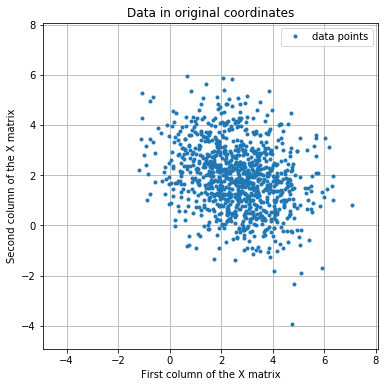

In [6]:
plot_vec_datas(X)
title('Data in original coordinates')

Számítsuk ki az adatvektorok kovarianciamátrixát, majd oldjuk meg a kovarianciamátrix sajátérték-problémáját! Készítsünk egy ábrát, melyen az $\mathbf{X}$ mátrixban szereplő adatpontokra rárajzoljuk a kovarianciamátrix sajátvektorait oly módon, hogy a sajátvektorok hossza egyezzen meg a hozzájuk tartozó sajátértékkel! Ügyeljünk a sajátvektorok normálására, és arra hogy a sajátvektorokat a ponthalmaz súlypontjából kiindulva kell ábrázolni!

In [7]:
'''
def cov_matr(X):
    N = len(X[:,0])
    D = len(X[0,:])
    M = numpy.empty(shape=(N,D)) 
    for i in range(D):  
        mean_col = sum(X[:,i])/N
        M[:,i] = X[:,i]-mean_col #kivonom az oszlopok elemeibol az oszlopok atlagat
    M_T = M.transpose()
    Cov_matr = (1/N)*matmul(M_T,M)
    return Cov_matr
'''

'\ndef cov_matr(X):\n    N = len(X[:,0])\n    D = len(X[0,:])\n    M = numpy.empty(shape=(N,D)) \n    for i in range(D):  \n        mean_col = sum(X[:,i])/N\n        M[:,i] = X[:,i]-mean_col #kivonom az oszlopok elemeibol az oszlopok atlagat\n    M_T = M.transpose()\n    Cov_matr = (1/N)*matmul(M_T,M)\n    return Cov_matr\n'

In [8]:
def cov_matr(X):    
    mean_vec = np.mean(X, axis=0)
    Cov_matr = (X - mean_vec).T.dot((X - mean_vec)) / X.shape[0]
    return Cov_matr

In [9]:
C = cov_matr(X)
value,vector = eig(C)

In [10]:
def get_center(X):
    x_mean = mean(X[:,0])
    y_mean = mean(X[:,1])
    return x_mean, y_mean

In [11]:
def plot_eigvec(vec,val,X): 
    V = array([vec[:,0]*val[0],vec[:,1]*val[1]])
    x_mean, y_mean = get_center(X) 
    origin = [x_mean], [y_mean] 

    quiver(*origin, V[:,0], V[:,1],label='eigenvectors',angles='xy', scale_units='xy', scale=1, zorder=10)
    legend()

Text(0.5, 1.0, 'Data in original coordinates')

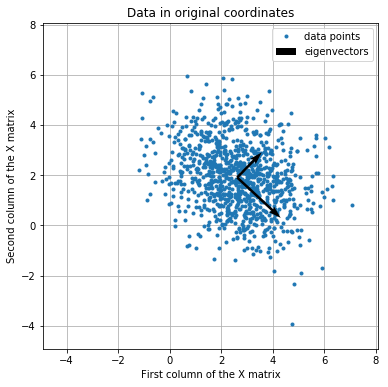

In [12]:
plot_eigvec(vector,value,X)
plot_vec_datas(X)
figsize(6,6)
title('Data in original coordinates')

 Határozzuk meg, és ábrázoljuk az adatvektorok főkomponenseit azonos osztásközű skálák mellett! Mit figyelhetünk meg?

In [13]:
eig_pairs = [(abs(value[i]), vector[:,i]) for i in range(len(value))] #parba rendezem a megfelelol sajatertek-sajatvektorokat
eig_pairs.sort(key=lambda x: x[0], reverse=True) #sajatertek szerint csokkeno sorrendbe rendezem

first = max([(v,i) for i,v in enumerate([eig_pairs[j][0] for j in range(len(X[0,:]))])])[1]
second = min([(v,i) for i,v in enumerate([eig_pairs[j][0] for j in range(len(X[0,:]))])])[1]

In [14]:
V = hstack((eig_pairs[first][1].reshape(2,1), #az a vektor amelyikhez a nagyobb sajatertek tartozik lesz elol
            eig_pairs[second][1].reshape(2,1)))

Text(0.5, 1.0, 'Data in PC coordinates')

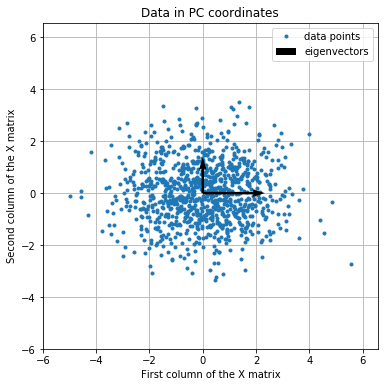

In [15]:
mean_vec = np.mean(X, axis=0)
PC = (X - mean_vec).dot(V)
    
C_pc = cov_matr(PC)
value_pc, vector_pc = eig(C_pc)
plot_eigvec(vector_pc,value_pc,PC)

plot_vec_datas(PC)
title('Data in PC coordinates')

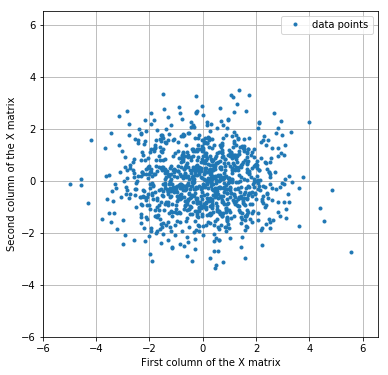

In [16]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
PC = sklearn_pca.fit_transform(X)


plot_vec_datas(PC)

Oldjuk meg az előző feladatot most a kovarianciamátrix meghatározása helyett közvetlenül szingulárisérték-dekompozícióval! Hogyan kaphatjuk vissza az SVD eredményéből a kovarianciamátrix sajátértékeit?

In [17]:
val_v, vec_v = eig((X.T).dot(X))
V_svd = array([vec_v[0],vec_v[1]])   

Text(0.5, 1.0, 'Data with SVD method')

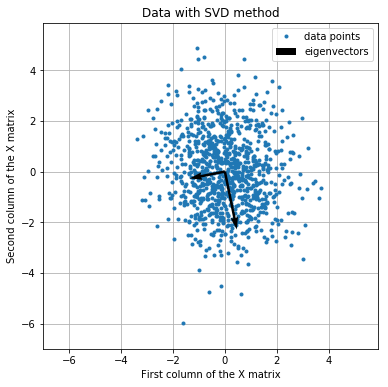

In [18]:
Y_svd = (X - mean_vec).dot(V_svd)

C_svd = cov_matr(Y_svd)
value_svd, vector_svd = eig(C_svd)
plot_eigvec(vector_svd,value_svd,Y_svd)

plot_vec_datas(Y_svd)
title('Data with SVD method')

In [ ]:
U, S, V_T= np.linalg.svd(X)

## 2. feladat - Sajátarcok meghatározása

Az alábbi függvény az évfolyam hallgatóiról készült fényképeket tölti be egy `numpy` adattömbbe. Az adattömb indexei a következők:

* 1: A fénykép sorszáma 0-tól
* 2: A fényképek sorainak száma (290)
* 3: A fényképek oszlopainak száma (220)

A szürkeárnyalatos fényképek úgy ábrázolódnak a számítógépben, hogy minden pixelhez egy 0 és 255 közötti egész szám tartozik (uint8 adattípus). A 0 érték fekete pixelt, a 255 fehéret, a köztes értékek pedig egy lineáris skálán a szürke különböző árnyalatait jelentik. A képek megjelenítésére a `matplotlib.pyplot.imshow` parancsa használható, az alábbi példák szerint.

A feladat, hogy alakítsük át a képeket adatvektorrá (például a `reshape`, `flatten` vagy `ravel` függvény segítségével), majd végezzük el az adatvektorok főkomponens-analízisét, azaz határozzuk meg azt a bázist, melyen a képekből készített adatvektorok korrelálatlanok. Mivel jelen esetben a $D = 290 \cdot 220 = 63800$ dimenziószám jóval nagyobb, mint $N$, a képek száma, ezért a bevezetőben említett lehetőségek közül csak a duális-PCA jöhet szóba.

Miután meghatároztuk a sajátvektorokat (sajátarcokat)

* ábrázoljuk a sajátértékeket csökkenő sorrendben, a sorszámuk függvényében
* keressük meg azt a legkisebb sajátértéket, ami még kilógónak tekinthető
* alakítsuk vissza a sajátvektorokat képpé, és ábrázoljuk a nagy sajátértékekhez tartozó sajátvektorokat

Ezek után készítsük el a sajátvektorokból készült csonkolt bázist, majd határozzuk meg az egyes arcokhoz tartozó főkomponenseket. Készítsük el az arcok csonkolt bázison történő rekonstrukcióját. Hány sajátvektor megtartása szükséges ahhoz, hogy az arcok felismerhetőek legyenek?

Próbáljunk meg egy olyan arcot kifejteni a kapott bázison, melyet nem használtunk fel a bázis meghatározásához.

In [ ]:
def load_pics():
    files = glob('/home/course/pca.data/*.bmp')
    img = cv2.imread(files[0])
    imgs = np.empty((len(files), img.shape[0], img.shape[1]), dtype=np.uint8)
    for i in range(0, len(files)):
        imgs[i,:,:] = cv2.imread(files[i])[:,:,0]
    return imgs

In [ ]:
imgs = load_pics()
imgs.shape

(40, 290, 220)

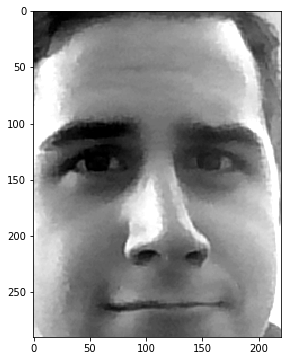

In [ ]:
plt.imshow(imgs[15], cmap='gray')

In [ ]:
imgs_datas = imgs.reshape(40,63800)
imgs_datas = imgs_datas.T


In [ ]:
def cov_matr_dual(X):    
    mean_vec = np.mean(X, axis=0)
    Cov_matr = (X - mean_vec).dot((X - mean_vec).T) / X.shape[0]
    return Cov_matr

In [ ]:
#for i in range(40):
#    vector_dd[:,i]= (1/sqrt(imgs_datas.shape[0]*value_d[i]))*(imgs_datas - np.mean(imgs_datas, axis=0)).T.dot(vector_d[:,i]) 


In [ ]:
C_dual = cov_matr_dual(imgs_datas)
value_d,vector_d = eig(C_dual)


vector_dd= (1/sqrt(imgs_datas.shape[0]*value_d))*(imgs_datas - np.mean(imgs_datas, axis=0)).T.dot(vector_d) 

eig_pairs_im = [(abs(value_d[i]), vector_dd[i]) for i in range(len(value_d))]
#parba rendezem a megfelelol sajatertek-sajatvektorokat
eig_pairs_im.sort(key=lambda x: x[0], reverse=True) #sajatertek szerint csokkeno sorrendbe rendezem

sorted_vals = [eig_pairs_im[j][0] for j in range(len(value_d))]
sorted_vecs = [eig_pairs_im[j][1] for j in range(len(value_d))]

In [ ]:
figsize(6,4)
plot(sorted_vals,'.')
grid(True)
xlabel('number')
ylabel('value')
title('Eigenvalues in descending order')

In [ ]:
#keressük meg azt a legkisebb sajátértéket, ami még kilógónak tekinthető
#????????????????????????


In [ ]:
V_im = hstack([eig_pairs_im[i][1].reshape(len(value_d),1) for i in range(shape(imgs_datas)[0])])

mean_vec_im = np.mean(imgs_datas, axis=0)
PC_im = (imgs_datas - mean_vec_im).T.dot(V_im)

imgs_pc = PC_im.T.reshape(40,290,220)

In [ ]:
#figsize(9,9)
for i in range(4):
    plt.subplot(2,2,i+1)
    imshow(imgs_pc[i], cmap='gray')

In [ ]:
V_def = hstack([eig_pairs_im[i][1].reshape(len(value_d),1) for i in range(20)])

PC_def = (imgs_datas - mean_vec_im).T.dot(V_def)

imgs_def = PC_def.T.reshape(20,290,220)

In [ ]:
figsize(5,5)
imshow(imgs_def[3], cmap='gray')